In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/main/dataset/E-commerce%20Customer%20Behavior%20-%20Sheet1.csv"
df = pd.read_csv(url)

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Convert Satisfaction Level to numeric scale
df['Satisfaction Level'] = df['Satisfaction Level'].map({
    'Low': 0,
    'Neutral': 1,
    'Medium': 2,
    'High': 3
})

In [4]:
# Target variable
y = df['Total Spend']

# Feature matrix
X = df[['Age',
        'Gender',
        'Items Purchased',
        'Average Rating',
        'Discount Applied',
        'Days Since Last Purchase',
        'Satisfaction Level']]

X.head()

,Age,Gender,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,29,1,14,4.6,True,25,NaN
1,34,0,11,4.1,False,18,1.0
2,43,1,9,3.4,True,42,NaN
3,30,0,19,4.7,False,12,NaN
4,27,0,13,4.0,True,55,NaN


In [5]:
# Make sure everything is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Fill NaNs with median for each column
X = X.fillna(X.median())
y = y.fillna(y.median())

print("NaNs in X:\n", X.isnull().sum())
print("NaNs in y:", y.isnull().sum())

NaNs in X:
 Age                         0
Gender                      0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64
NaNs in y: 0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (280, 7)
Testing samples: (70, 7)


In [7]:
# You can play with max_depth (e.g., 3, 4, 5, None)
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

print("Decision Tree Regressor training complete!")

Decision Tree Regressor training complete!


In [8]:
y_pred_tree = tree_model.predict(X_test)

tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2  = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor Evaluation:")
print("MAE:", tree_mae)
print("MSE:", tree_mse)
print("R² Score:", tree_r2)

Decision Tree Regressor Evaluation:
MAE: 8.248105390564335
MSE: 137.67889028839076
R² Score: 0.9989817905303081


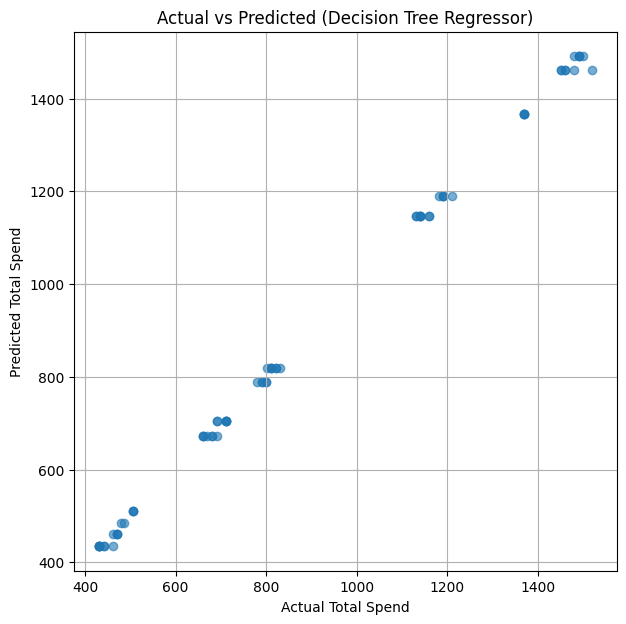

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs Predicted (Decision Tree Regressor)")
plt.grid(True)
plt.show()

In [10]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
2,Items Purchased,0.884074
1,Gender,0.099427
5,Days Since Last Purchase,0.008661
3,Average Rating,0.005666
4,Discount Applied,0.001955
0,Age,0.000217
6,Satisfaction Level,0.000000
